# **Задание** 

## **Цель:** изучить применение дерева решений в рамках задачи регрессии 
### **Описание задания:** 
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений. 
  
Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.  
  
**Результат:** получены знания по работе с деревом решений

### **Этапы работы:** 

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

    Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude
    :Missing Attribute Values: None

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

2. Проведите первичный анализ.  
   a. Проверьте данные на пропуски. Удалите в случае обнаружения.  

In [6]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [7]:
y.isna().sum()

0

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


3. Провести нормализацию.  
   Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [11]:
mms = MinMaxScaler()

In [12]:
df = pd.concat([X, y], axis =1)

In [13]:
mms.fit(df)

MinMaxScaler()

In [14]:
df = pd.DataFrame(mms.transform(df), columns=df.columns.to_list())

In [15]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.130105
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.128043
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.159383
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.143713


In [16]:
X = df.iloc[:,0:8]

In [17]:
y = df.iloc[:,8:9]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

4. Обучите [модель регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на обучающем множестве.

In [19]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [20]:
y_test_pred = model.predict(X_test)

In [21]:
model.score(X_train, y_train)

0.610725161317683

In [22]:
model.score(X_test, y_test)

0.5882336691134314

6. Обучите [дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) на обучающем множестве.  
a. Повторите п. 5 для полученной модели.  
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по [ссылке](https://mljar.com/blog/visualize-decision-tree/).

In [23]:
model_trees = DecisionTreeRegressor(max_depth=4, random_state=10)
model_trees.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=10)

In [24]:
y_test_pred = model_trees.predict(X_test)

In [25]:
model_trees.score(X_train, y_train)

0.5910113461747724

In [26]:
model_trees.score(X_test, y_test)

0.5562004962656217

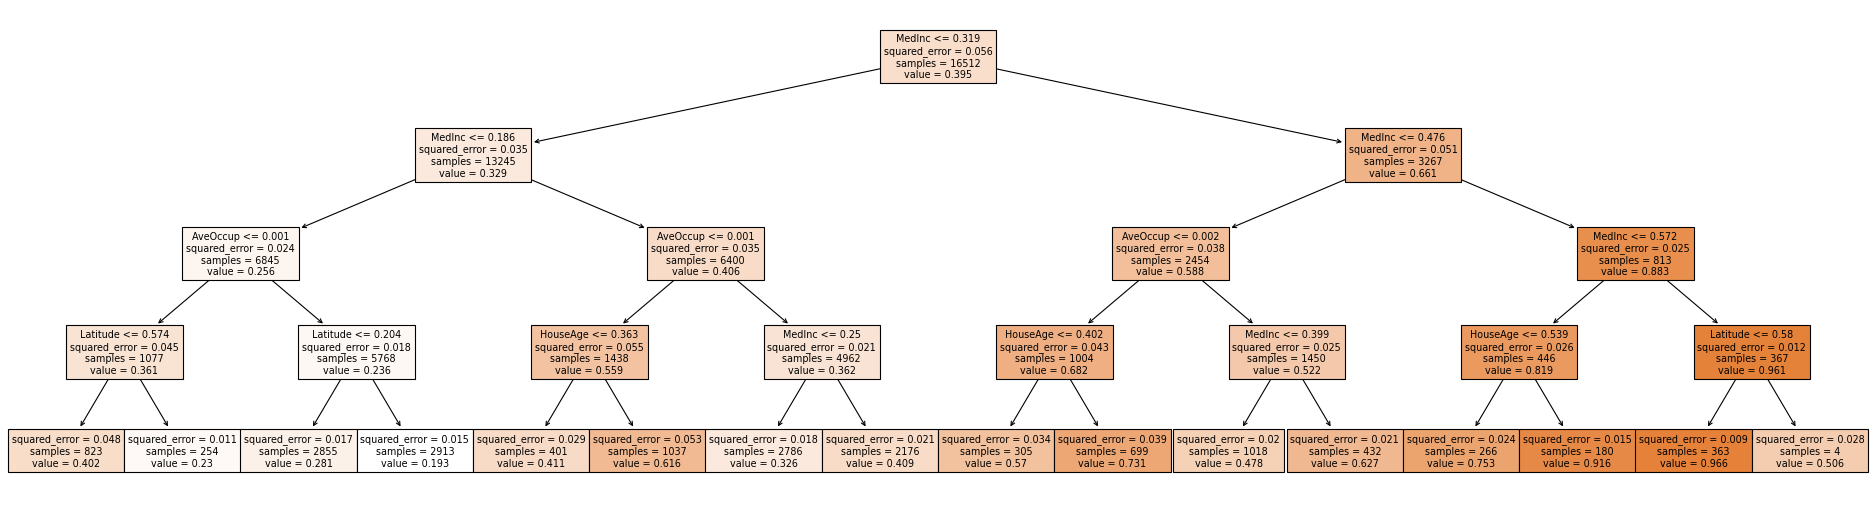

In [27]:
plt.figure(figsize=(30, 8), dpi=80)
plot_tree(model_trees, feature_names=X.columns.to_list(), filled=True);

7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.  
a. Повторите п. 5 для полученной модели.

In [28]:
# Узнаём значение R2 при отсутствии ограничения на количество глубины деревьев
model_trees = DecisionTreeRegressor(random_state=10)
model_trees.fit(X_train, y_train)
y_test_pred = model_trees.predict(X_test)

In [29]:
model_trees.score(X_test,y_test)

0.6005956216311379

In [30]:
model_trees.get_depth() # максимальная гглубина, которую используем как верхнюю границу для поиска оптимальной глубины

34

In [31]:
# расчёт точности при разной глубине:
max_depth_range = list(range(1, 35))
accuracy = [] 
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth = depth, random_state = 0)
    reg.fit(X_train, y_train)    
    score = reg.score(X_test, y_test)
    accuracy.append(score)

In [32]:
x,i=[],1
while i< len(accuracy)+1:
    x.append(i)
    i+=1

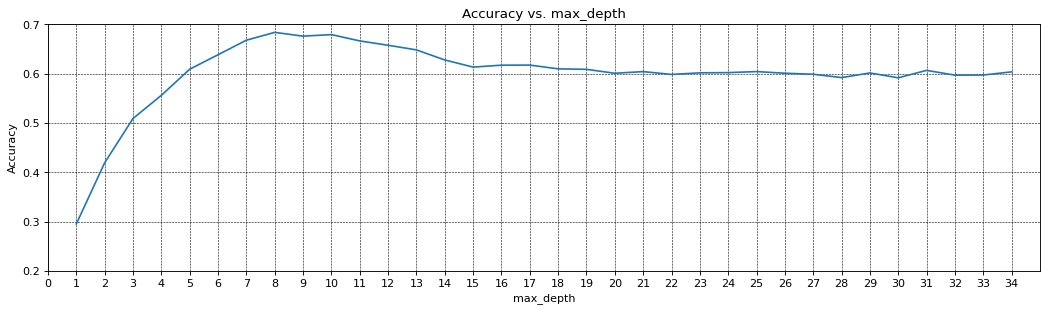

In [33]:
plt.figure(figsize=(16, 4), dpi=80)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xlim(1, 35)
plt.ylim(0.2, 0.7)
plt.xticks(np.arange(0,35,1))
plt.title('Accuracy vs. max_depth')
plt.plot(x, accuracy)
plt.show()

In [34]:
max(accuracy) # достигается при оптимальном выборе max_depth = 8

0.683952953701713

In [35]:
# посмотрим на точность на обучающейся выборке и сравним с точностью на тренировочной выборке
model_trees = DecisionTreeRegressor(random_state=10, max_depth=8)
model_trees.fit(X_train, y_train)
model_trees.score(X_train, y_train)

0.7692046446282715

##### Вывод: Даже на оптимальной точности по тестовой выборке модель выглядит переобучившейся.

8. Сформулируйте выводы по проделанной работе.  
a. Сравните точность двух моделей.  
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

### **Выводы:**  
а. В данном случае точность при использовании Деревьев выше чем при использовании обычной Линейной регрессии, но в данном случае модель выглядит переобучившейся, поскольку точность на тренировочной выборке значительно выше чем на тестовой.  
б. Деревья, по-видимому, лучше работают, когда зависимость целевой переменной от других переменных нелинейная.